# **1. Perkenalan Dataset**

### 1. Perkenalan Dataset

Dataset yang digunakan dalam proyek ini adalah **Amazon Reviews Polarity Dataset**, yang diambil dari repositori terbuka **Hugging Face Datasets** (`amazon_polarity`).

Dataset ini berisi kumpulan **ulasan produk dari pelanggan Amazon** yang telah diklasifikasikan ke dalam dua kategori sentimen:

- `1` → **Ulasan Positif**
- `0` → **Ulasan Negatif**

Jumlah total data pada versi lengkap mencapai lebih dari **3 juta sampel**, namun untuk keperluan eksperimen yang efisien dan terukur, digunakan subset berimbang sebanyak:

- **100.000 ulasan positif**
- **100.000 ulasan negatif**

Pemilihan sampel dilakukan secara **acak (random sampling)** guna menjaga representasi yang adil serta menghindari bias distribusi data.

Dataset ini sangat sesuai untuk tugas klasifikasi teks karena:
- Ukurannya besar dan memungkinkan pelatihan model skala menengah-besar.
- Formatnya sederhana (hanya label dan teks).
- Tidak mengandung informasi sensitif atau pribadi.

**Sumber Dataset:**
- Hugging Face: [https://huggingface.co/datasets/amazon_polarity](https://huggingface.co/datasets/amazon_polarity)


# **2. Import Library**


Pada tahap ini, Saya perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import gdown
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
# # Langkah Pertama Load Data
# df = pd.read_csv("../dataset_amazon_raw.csv", low_memory=False)
# print(df.head())

# Google Drive link (RAW)
raw_url = "https://drive.google.com/uc?id=1gnkJYuGo3Slb2euugnutV_HDFrFDmrdD"
input_path = "dataset_amazon_raw.csv"
gdown.download(raw_url, input_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1gnkJYuGo3Slb2euugnutV_HDFrFDmrdD
From (redirected): https://drive.google.com/uc?id=1gnkJYuGo3Slb2euugnutV_HDFrFDmrdD&confirm=t&uuid=ba42dc9c-74c4-4924-8b94-732d42241571
To: E:\Projects\Working\Mentor Asah 2025\Eksperimen_SML_kenbamaulana\preprocessing\dataset_amazon_raw.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.57G/1.57G [05:11<00:00, 5.05MB/s]


'dataset_amazon_raw.csv'

In [4]:
# =============================
# STEP 4: Load Data
# =============================
df = pd.read_csv(input_path, low_memory=False)
print(df.head())

   label                                              title  \
0      1                     Stuning even for the non-gamer   
1      1              The best soundtrack ever to anything.   
2      1                                           Amazing!   
3      1                               Excellent Soundtrack   
4      1  Remember, Pull Your Jaw Off The Floor After He...   

                                             content  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  
3  I truly like this soundtrack and I enjoy video...  
4  If you've played the game, you know how divine...  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap inisayada akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [13]:
# EDA sederhana untuk dataset Amazon raw
print("🔍 Jumlah data:", df.shape[0])
print("📊 Distribusi label:\n", df['label'].value_counts(), "\n")

print("------------------------------------------------------------------------------")

# Panjang teks & jumlah kata
df['text_length'] = df['content'].apply(len)
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

print("📏 Statistik panjang teks:\n", df['text_length'].describe().to_string(), "\n")
print("📝 Statistik jumlah kata:\n", df['word_count'].describe().to_string(), "\n")

print("------------------------------------------------------------------------------")
# Rata-rata panjang title
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
print("📌 Rata-rata panjang judul:", round(df['title_length'].mean(), 2), "karakter\n")

print("------------------------------------------------------------------------------")

# Cek missing value
print("❓ Missing values:\n", df.isnull().sum())

🔍 Jumlah data: 3599793
📊 Distribusi label:
 label
1    1799913
0    1799880
Name: count, dtype: int64 

------------------------------------------------------------------------------
📏 Statistik panjang teks:
 count    3.599793e+06
mean     4.051441e+02
std      2.342701e+02
min      4.000000e+00
25%      2.070000e+02
50%      3.560000e+02
75%      5.660000e+02
max      1.010000e+03 

📝 Statistik jumlah kata:
 count    3.599793e+06
mean     7.416971e+01
std      4.229860e+01
min      1.000000e+00
25%      3.900000e+01
50%      6.600000e+01
75%      1.030000e+02
max      2.540000e+02 

------------------------------------------------------------------------------
📌 Rata-rata panjang judul: 24.51 karakter

------------------------------------------------------------------------------
❓ Missing values:
 label           0
title           0
content         0
text_length     0
word_count      0
title_length    0
dtype: int64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahayang bisap
- 
1. Menghapus atau Menangani Data Kosong (Missing Val
karena data sudah cukup bersih dari sumber datasetnyaokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
# Selanjutnya cek missing Value
print("Missing Value")
print(df.isnull().sum())

Missing Value
label             0
title           207
content           0
text_length       0
word_count        0
title_length      0
dtype: int64


In [7]:
# Drop
df.dropna(inplace=True)
# Selanjutnya cek missing Value ulang
print("Missing Value")
print(df.isnull().sum())

Missing Value
label           0
title           0
content         0
text_length     0
word_count      0
title_length    0
dtype: int64


In [8]:
#cek data
print(f"jumlah baris : {df.shape[0]}")
print(f"jumlah kolom : {df.shape[1]}")
print("------------------------------------------------------------------------------")
print(df.iloc[:,0].value_counts())
print("------------------------------------------------------------------------------")
print(df.iloc[:,1].value_counts())

jumlah baris : 3599793
jumlah kolom : 6
------------------------------------------------------------------------------
label
1    1799913
0    1799880
Name: count, dtype: int64
------------------------------------------------------------------------------
title
Disappointed                              9623
Disappointing                             9169
Excellent                                 4367
Great                                     3530
Don't waste your money                    3201
                                          ... 
What A Slap In The Face To Masami Ueda       1
Looks nice, low functionality                1
compact, but hard to clean                   1
what is it saying?                           1
Makes My Blood Run Red-White-And-Blue        1
Name: count, Length: 2628752, dtype: int64


In [9]:
# split data
positif = df[df.iloc[:,0] == 0]. sample(n=100_000, random_state=42)
negatif = df[df.iloc[:,0] == 1]. sample(n=100_000, random_state=42)
df_sampled = pd.concat([positif,negatif]).sample(frac=1,random_state=42).reset_index(drop=True)
print(f"setelah sampling, total data: {df_sampled.shape[0]}")
print("distribusi label")
print(df_sampled.iloc[:,0].value_counts())
print("------------------------------------------------------------------------------")
print(df_sampled.head())

setelah sampling, total data: 200000
distribusi label
label
1    100000
0    100000
Name: count, dtype: int64
------------------------------------------------------------------------------
   label                                              title  \
0      1                                  june of 44's best   
1      0  Dont get this game its missing something impor...   
2      1    awesome...they don't make'em like this anymore!   
3      0             Utter waste of paper! Save your money.   
4      0                       Disturbing and venomous tone   

                                             content  text_length  word_count  \
0  this has to be june of 44's best album to date...          160          29   
1  OK so i'm a big fan of the ddr series but ther...          545         108   
2  this movie is pretty cool. they don't make rel...          545          97   
3  Do not be fooled by the reference to Word Frea...          303          50   
4  I was quite taken aback 

In [10]:
#
# df_sampled.columns = ['label','title','content']
# df_sampled['text_length'] = df_sampled['content'].apply(len)
# df_sampled['word_count'] = df_sampled['content'].apply(lambda x: len(str(x).split()))

  
# print(f" Panjang Teks : {df_sampled['text_length'].describe.to_}")
# print(f" jumlah kata : {df_sampled['word_count'].describe}")  
# print(f"Panjang Teks:\n{df_sampled['text_length'].describe().to_string()}")
# print(f"Jumlah Kata:\n{df_sampled['word_count'].describe().to_string()}")

df_sampled[['text_length', 'word_count']].describe()


,text_length,word_count
count,200000.000000,200000.000000
mean,406.206165,74.346695
std,234.808914,42.377079
min,25.000000,4.000000
25%,208.000000,39.000000
50%,357.000000,66.000000
75%,567.000000,103.000000
max,1010.000000,213.000000


<function matplotlib.pyplot.show(close=None, block=None)>

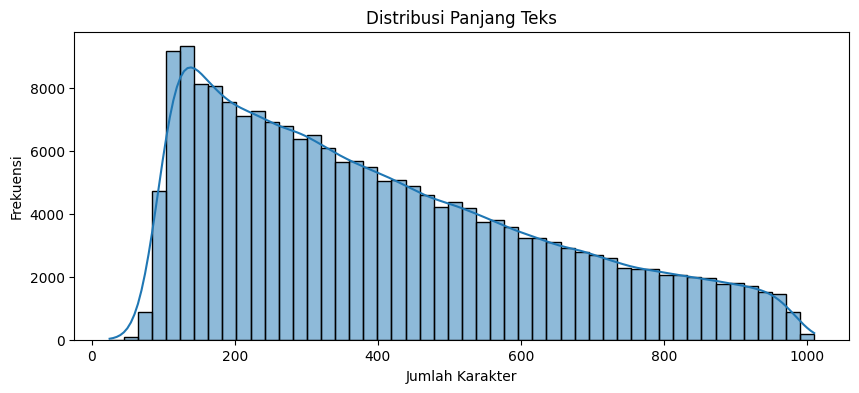

In [11]:
# Distribusi Panjang Teks
plt.figure(figsize=(10,4))
sns.histplot(df_sampled['text_length'], bins=50, kde= True)
plt.title("Distribusi Panjang Teks")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Frekuensi")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

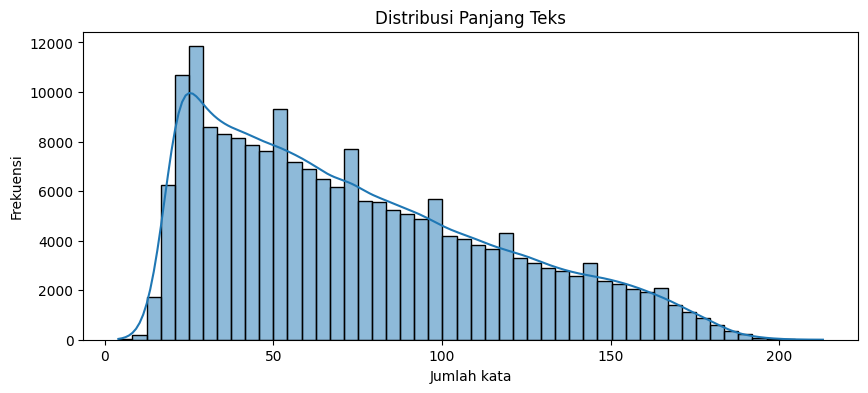

In [12]:
# Distribusi Panjang Teks
plt.figure(figsize=(10,4))
sns.histplot(df_sampled['word_count'], bins=50, kde= True)
plt.title("Distribusi Panjang Teks")
plt.xlabel("Jumlah kata")
plt.ylabel("Frekuensi")
plt.show

In [14]:
# Fungsi Cleaning
def clean_text(content):
    text = str(content).lower()
    text = re.sub(r"http\S+|www\S+","", content)
    text = re.sub(r"[^a-z\s]","", content)
    return text

df_sampled['clean_text'] = df_sampled['content'].apply(clean_text)
# df_sampled.to_csv("../dataset_amazon_preprocessing/amazon_cleaned_preprocessing.csv", index=False)
# Simpan ke lokal terlebih dahulu
output_local = "amazon_cleaned_preprocessing.csv"
df_sampled.to_csv(output_local, index=False)
print(f"✅ File berhasil disimpan di lokal: {output_local}")


✅ File berhasil disimpan di lokal: amazon_cleaned_preprocessing.csv
